In [1]:
# Importing necessary libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym import spaces
import random

In [2]:
#SETTING THE ENVIRONMENT
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self,env_type):
    self.observation_space = spaces.Discrete(12)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 14
    if env_type=='Stochastic' :
      self.type=0.90
    else:
      self.type = 1

      
  def reset(self):
    #state and their immediate rewards 
    self.timestep = 0
    self.agent_value = [0, 0]
    self.target = [2, 3]
    self.rewards_1=[1,2]
    self.rewards_2=[2,2]
    self.rewards_3=[1,3]
    self.rewards_4=[2,1]
    self.state = np.zeros((3, 4))
    self.state[tuple(self.rewards_1)]=5
    self.state[tuple(self.rewards_2)]=10
    self.state[tuple(self.rewards_3)]=2
    self.state[tuple(self.rewards_4)]=10
    self.state[tuple(self.agent_value)] = 1
    self.state[tuple(self.target)] = 1
    obs_value = self.state.flatten()

    return obs_value

  def step(self, action):
    if action == 0:
      if random.random()< self.type:
          self.agent_value[0] += 1
    if action == 1:
      if random.random()< self.type:
          self.agent_value[0] -= 1
    if action == 2:
      if random.random()< self.type:
        self.agent_value[1] += 1
    if action == 3:
      if random.random()< self.type:
        self.agent_value[1] -= 1
    
    self.agent_value[0] = np.clip(self.agent_value[0], 0, 2)
    self.agent_value[1] = np.clip(self.agent_value[1], 0, 3)
    self.state = np.zeros((3,4))
    self.state[tuple(self.rewards_1)]=5
    self.state[tuple(self.rewards_2)]=10
    self.state[tuple(self.rewards_3)]=2
    self.state[tuple(self.rewards_4)]=10
    self.state[tuple(self.agent_value)] = 0.75
    self.state[tuple(self.target)] = 1


    if(self.agent_value == self.target):
      self.reward = 40
    elif(self.agent_value == self.rewards_1):
      self.reward = -5
    elif(self.agent_value == self.rewards_2):
      self.reward = 2
    elif(self.agent_value == self.rewards_3):
      self.reward = -2
    elif(self.agent_value == self.rewards_4):
      self.reward = 2
    else:
      self.reward = 0
    obs_value = self.state.flatten()

    reward = 0
    if (self.agent_value == self.target):
      reward = 1

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps else False
    info = {}

    return obs_value, reward, done, info

  def render(self):
    plt.imshow(self.state)
  


In [3]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space


  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

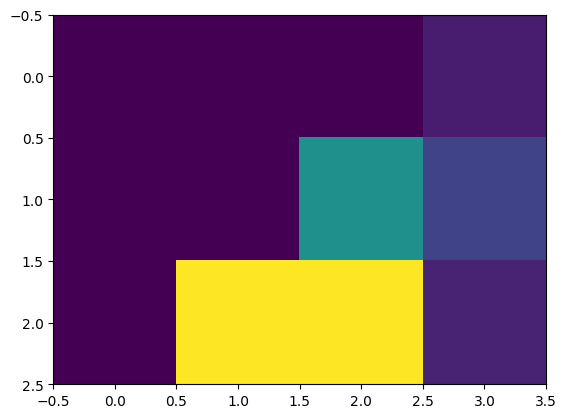

In [4]:
from google.colab import widgets
import time

env = GridEnvironment('Deterministic')
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)


# PART 2
SARSA Method

In [5]:
class SARSA_model:
  def __init__(self, env, episodes,epsilon,alpha,gamma=0.9):
    #resetting the environment
    env.reset()
    self.env = env
    self.alpha =alpha
    self.gamma =gamma
    self.epsilon =epsilon
    self.num_episodes=episodes
    self.qtable = np.ones([12, 4])-1 # initialize Q-table with -1 values
    self.reward1 = [] # list to store training rewards for each episode
    self.timestep = [] # list to store number of timesteps taken for each episode during training
    self.test_timestep = [] # list to store number of timesteps taken for each episode during testing
    self.test_reward1 = [] # list to store testing rewards for each episode
    self.eps=[] # list to store epsilon values for each episode
    self.reset()

  def reset(self):
    self.env.reset()
    self.done = False
    self.action = 0
    self.reward = 0
    self.state = 0
    self.total_reward = 0


  def train(self):
    for i in range(self.num_episodes):
      self.reset()
      
      if (np.random.rand() < self.epsilon): # epsilon-greedy action selection: choose random action with probability epsilon
          self.action=self.env.action_space.sample() 
      else:
          self.action = np.argmax(self.qtable[self.state])   # choose the action with highest Q-value
      
      while not self.done:
        self.qtable[-1] = 0 # set Q-value for terminal state to 0
        _, self.reward, self.done, _ = self.env.step(self.action) # take a step in the environment
        state1 = (4 * self.env.agent_value[0]) + self.env.agent_value[1] # get the new state after taking the step
        
        if (np.random.rand() < self.epsilon): # choose action randomly with probability epsilon
            self.action1=self.env.action_space.sample() 
        else:
            self.action1 = np.argmax(self.qtable[state1])   # choose the action with highest Q-value
          
        # update Q-value for the current state-action pair using SARSA algorithm
        self.qtable[self.state][self.action] += self.alpha * (self.reward + self.gamma * self.qtable[state1][self.action1] - self.qtable[self.state][self.action])
        self.state = state1 # update state and action for next iteration
        self.action = self.action1
        self.total_reward += self.reward
        
      self.timestep.append(self.env.timestep) # store number of timesteps taken for this episode
      self.reward1.append(self.total_reward) # store the total reward obtained for this episode
      self.epsilon=self.epsilon* 0.99 # decrease epsilon for next episode
      self.eps.append(self.epsilon)

  def test(self):
    for _ in range(10):
      self.reset()
      while not self.done:
        self.action = np.argmax(self.qtable[self.state]) # choose the action with highest Q-value
        _, self.reward, self.done, _ = self.env.step(self.action) # take a step in the environment
        self.state = (4 * self.env.agent_value[0]) + self.env.agent_value[1] # get the new state after taking the step
        self.total_reward += self.reward
    
      self.test_reward1.append(self.total_reward) # store the total reward obtained for this episode during testing
      self.test_timestep.append(self.env.timestep) 


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.54584351 0.4948529  0.63545385 0.50613671]
 [0.71788267 0.54139199 0.39768077 0.50596877]
 [0.26283931 0.04710077 0.         0.53776874]
 [0.59500832 0.1195223  0.08849988 0.        ]
 [0.31660537 0.28555637 0.69759052 0.28071131]
 [0.80463205 0.5475788  0.68799526 0.55689279]
 [0.7137433  0.34730099 0.88678962 0.55087261]
 [0.97592051 0.37214721 0.81027842 0.71320051]
 [0.4307685  0.39063125 0.75060452 0.14532565]
 [0.74373636 0.63210242 0.89790688 0.68565855]
 [0.83654946 0.75832619 0.99957884 0.71132632]
 [0.4        0.         0.         0.        ]]
REWARD Earned
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 0, 0, 0, 0, 3, 6, 0, 1, 3, 8, 0, 0, 7, 5, 1, 0, 0, 1, 0, 0, 1, 1, 5, 0, 8, 0, 3, 0, 4, 0, 0, 3, 0, 5, 6, 0, 4, 3, 0, 0, 0, 1, 1, 4, 9, 4, 0, 9, 4, 9, 0, 6, 4, 2, 8, 10, 5, 1, 9, 6, 6, 3, 6, 3, 4, 7, 6, 7, 8, 1, 8, 7, 3, 10, 6, 5, 5, 7, 2, 6, 0, 0, 6, 0, 8, 7, 0, 8, 6, 8, 9, 5, 0, 3, 8, 9, 6, 9, 8, 5, 8, 8, 6, 5, 9, 2, 2, 5, 4, 5

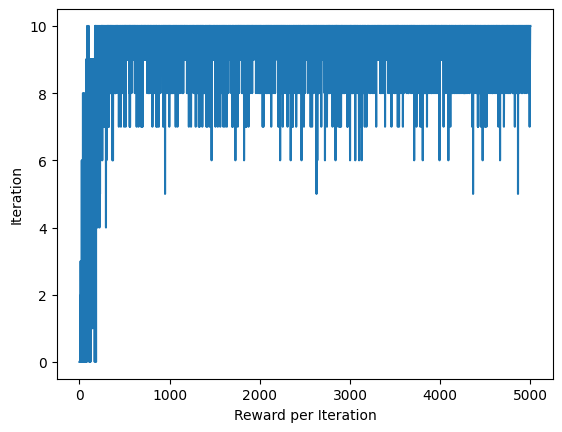

PLOT FOR TEST DATA


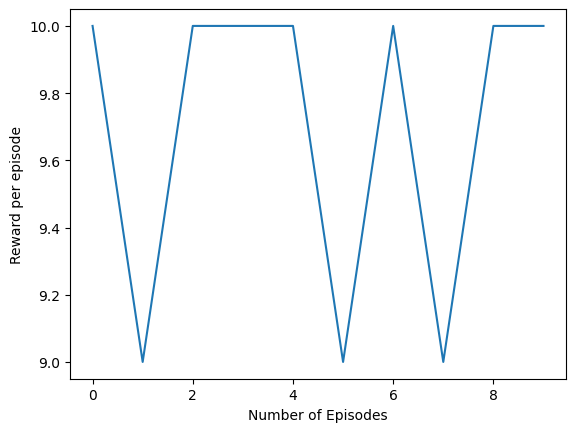

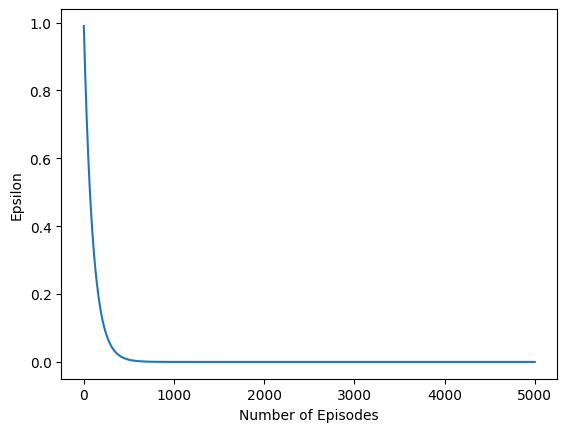

In [8]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = SARSA_model(stch, 5000,1, 0.4)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("PLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("PLOT FOR TEST DATA")
plt.plot(qs_learn.test_reward1)
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


[[0.38498218 0.46985733 0.6379146  0.49704705]
 [0.7222241  0.55249594 0.49731207 0.41640399]
 [0.67272668 0.50799752 0.68166027 0.44110263]
 [0.89449219 0.58173323 0.19353183 0.45768527]
 [0.26043404 0.11951065 0.68339999 0.2024974 ]
 [0.66852122 0.35273765 0.80773869 0.53604694]
 [0.77832723 0.70116418 0.89964489 0.61446209]
 [0.9999906  0.6362443  0.88233981 0.63529378]
 [0.15289143 0.08730686 0.67513446 0.148531  ]
 [0.44449416 0.33536393 0.89984017 0.34785463]
 [0.80102729 0.75908536 0.99999323 0.71686446]
 [0.4        0.         0.         0.        ]]
REWARD Earned
[1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 9, 6, 5, 0, 0, 5, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 5, 0, 6, 7, 5, 7, 1, 6, 4, 4, 2, 0, 6, 6, 8, 5, 0, 4, 0, 8, 0, 2, 3, 10, 2, 5, 7, 6, 3, 0, 7, 2, 7, 7, 6, 1, 6, 6, 7, 1, 5, 8, 5, 4, 6, 6, 5, 6, 8, 7, 4, 5, 6, 7, 7, 0, 2, 8, 8, 8, 6, 6, 6, 5, 5, 7, 5, 9, 8, 0, 8, 1, 1, 8, 3, 8, 9, 4, 7, 7, 3, 7, 2, 10, 8, 9, 6, 9, 8, 4, 4, 2, 6

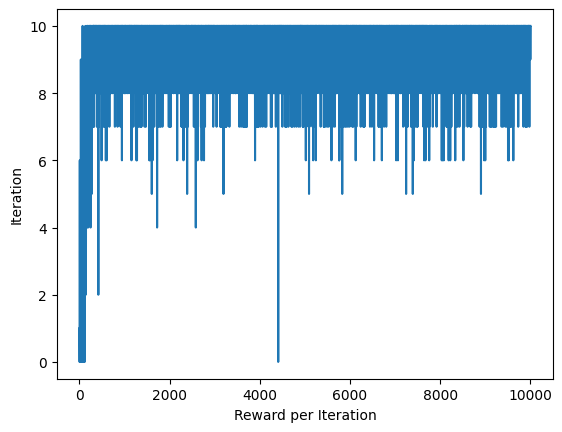

PLOT FOR TEST DATA


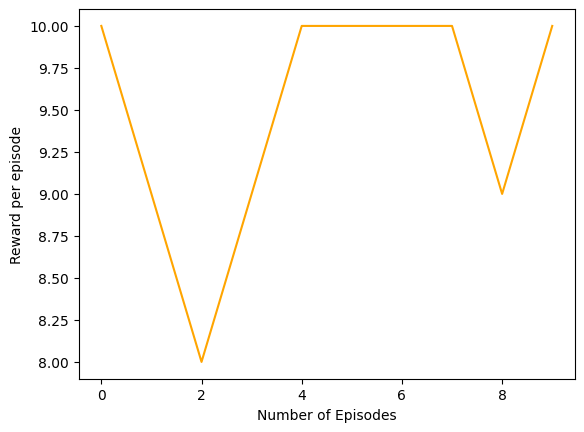

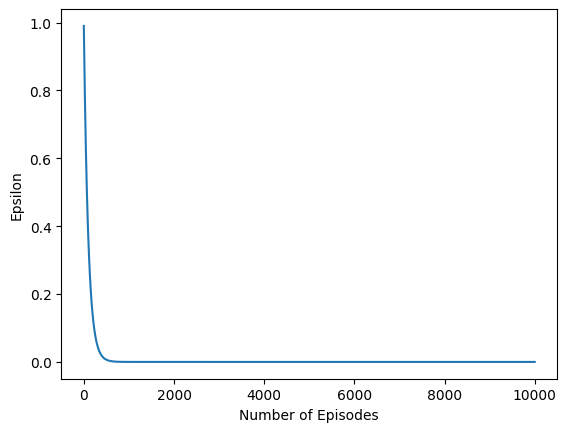

In [7]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = SARSA_model(stch, 10000, 1, 0.4)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("/nPLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("PLOT FOR TEST DATA")
plt.plot(qs_learn.test_reward1, color = "orange")
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


[[0.46384953 0.42101456 0.65262164 0.47786333]
 [0.57047784 0.46960339 0.72854501 0.47894126]
 [0.80999894 0.58674385 0.54623267 0.58034043]
 [0.89497726 0.69804095 0.68869221 0.52648167]
 [0.58780151 0.3983384  0.27875352 0.3310959 ]
 [0.78755801 0.45431495 0.64854927 0.63045374]
 [0.8999999  0.65683516 0.70355884 0.61303352]
 [1.         0.79918197 0.83235973 0.77246834]
 [0.52294548 0.29761546 0.79396777 0.5215141 ]
 [0.59064232 0.33596946 0.88873288 0.48751631]
 [0.80518839 0.77096355 1.         0.67079391]
 [0.6        0.         0.         0.        ]]
REWARD Earned
[1, 0, 0, 2, 0, 0, 0, 0, 0, 3, 4, 0, 0, 1, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 4, 1, 0, 0, 4, 0, 7, 4, 4, 4, 2, 4, 0, 2, 0, 0, 3, 0, 0, 0, 7, 1, 7, 0, 5, 0, 0, 1, 7, 0, 

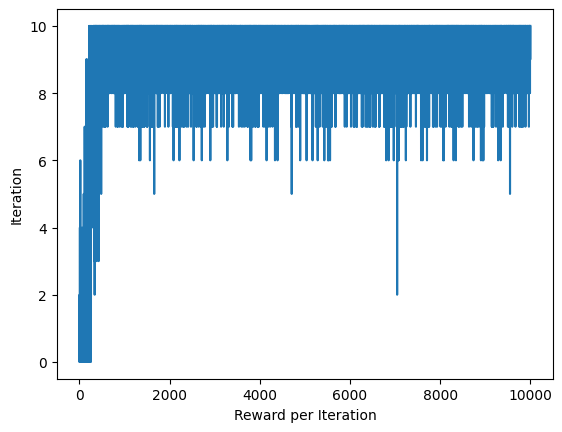

PLOT FOR TEST DATA


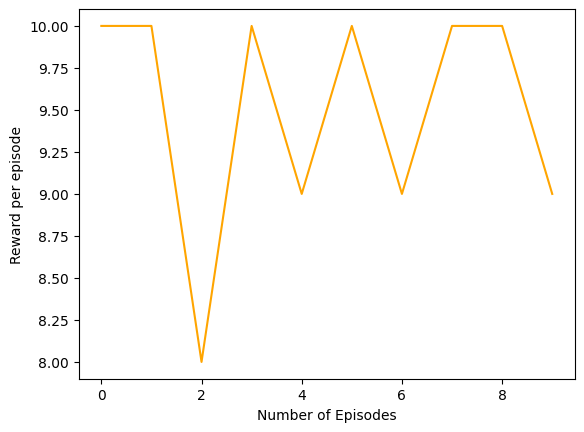

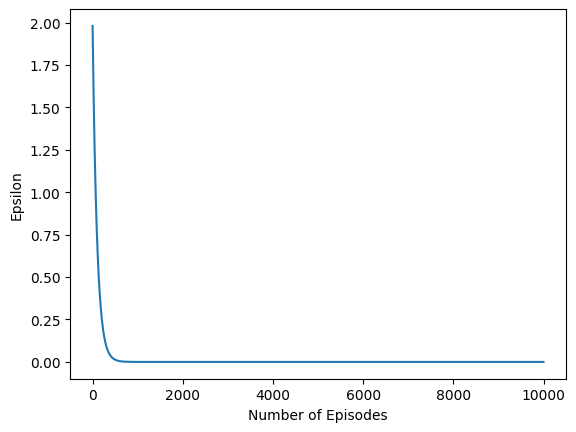

In [9]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = SARSA_model(stch, 10000, 2, 0.6)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("/nPLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("PLOT FOR TEST DATA") 
plt.plot(qs_learn.test_reward1, color = "orange")
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


# Part 3

Apply Qlearning to solve the environment

In [25]:
class Q_learning_model:
  def __init__(self, env, episodes, epsilon, alpha, gamma=0.9):
    # resetting the environment
    env.reset()
    self.env = env
    self.alpha = alpha
    self.gamma = gamma
    self.epsilon = epsilon
    self.num_episodes = episodes
    self.qtable = np.ones([12, 4]) - 1  # initialize Q-table with -1 values
    self.reward1 = []  # list to store training rewards for each episode
    self.timestep = []  # list to store number of timesteps taken for each episode during training
    self.test_timestep = []  # list to store number of timesteps taken for each episode during testing
    self.test_reward1 = []  # list to store testing rewards for each episode
    self.eps = []  # list to store epsilon values for each episode
    self.reset()

  def reset(self):
    self.env.reset()
    self.done = False
    self.action = 0
    self.reward = 0
    self.state = 0
    self.total_reward = 0

  def train(self):
    for i in range(self.num_episodes):
      self.reset()

      while not self.done:
        if (np.random.rand() < self.epsilon): # epsilon-greedy action selection: choose random action with probability epsilon
          self.action = self.env.action_space.sample() 
        else:
          self.action = np.argmax(self.qtable[self.state]) # choose the action with highest Q-value

        _, self.reward, self.done, _ = self.env.step(self.action) # take a step in the environment
        state1 = (4 * self.env.agent_value[0]) + self.env.agent_value[1] # get the new state after taking the step

        # update Q-value for the current state-action pair using Q-learning algorithm
        self.qtable[self.state][self.action] += self.alpha * (self.reward + self.gamma * np.max(self.qtable[state1]) - self.qtable[self.state][self.action])
        self.state = state1 # update state for next iteration
        self.total_reward += self.reward

      self.timestep.append(self.env.timestep) # store number of timesteps taken for this episode
      self.reward1.append(self.total_reward) # store the total reward obtained for this episode
      self.epsilon = self.epsilon * 0.99 # decrease epsilon for next episode
      self.eps.append(self.epsilon)

  def test(self):
    for _ in range(10):
      self.reset()
      while not self.done:
        self.action = np.argmax(self.qtable[self.state]) # choose the action with highest Q-value
        _, self.reward, self.done, _ = self.env.step(self.action) # take a step in the environment
        self.state = (4 * self.env.agent_value[0]) + self.env.agent_value[1] # get the new state after taking the step
        self.total_reward += self.reward

      self.test_reward1.append(self.total_reward) # store the total reward obtained for this episode during testing
      self.test_timestep.append(self.env.timestep)


[[1.89191650e+00 3.44602474e+00 6.39310042e+00 3.31846616e+00]
 [7.14072274e+00 5.31259678e+00 3.01502970e+00 3.24548211e+00]
 [6.16044169e+00 8.69468925e-02 4.10765777e-01 9.07479433e-02]
 [2.93044032e+00 1.69255060e-02 2.96335235e-02 5.71133198e-02]
 [6.45766906e-02 2.01417529e-01 5.56325031e+00 1.29366947e-01]
 [4.20184006e+00 4.25478418e+00 8.03207461e+00 2.49457242e+00]
 [8.83244905e+00 3.08192215e+00 5.54314175e+00 3.57114903e+00]
 [9.93397016e+00 2.69360852e-01 2.74769687e+00 2.86129965e+00]
 [6.00571702e-03 3.78989045e-03 9.71521362e-01 7.96137642e-03]
 [6.90407282e-01 8.46397797e-01 8.00289350e+00 2.69194606e-02]
 [6.96994803e+00 5.10269876e+00 9.99972145e+00 4.49076815e+00]
 [9.98158316e+00 8.98401899e+00 1.00000000e+01 9.02929101e+00]]
REWARD Earned
[0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 0, 0, 0, 3, 0, 0, 0, 5, 4, 1, 4, 3, 2, 1, 2, 0, 1, 0, 4, 0, 7, 0, 0, 0, 8, 1, 1, 4, 3, 4, 0, 4, 2, 2, 6, 0, 0, 0, 1, 2, 4, 4, 8, 6, 8, 7, 5, 0, 3, 8, 2, 3, 8, 

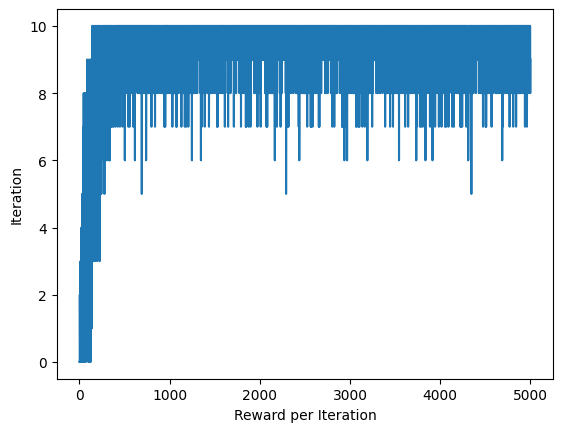


PLOT FOR TEST DATA


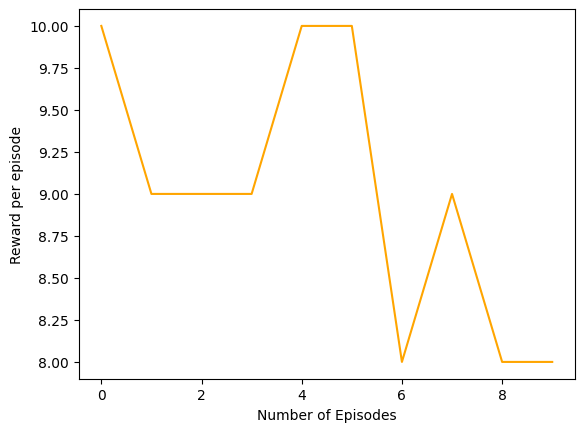

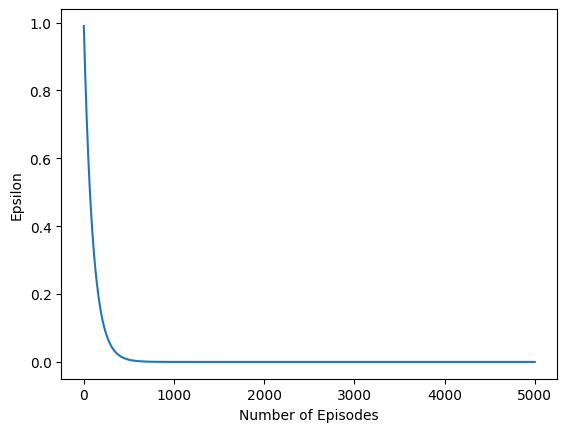

In [22]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = Q_learning_model(stch, 5000, 1, 0.1)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("\nPLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("\nPLOT FOR TEST DATA")
plt.plot(qs_learn.test_reward1, color = "orange")
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

print("\n")

plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[ 5.59434169  5.47032317  6.28675945  5.46629812]
 [ 4.40233875  3.1259613   7.01555914  4.13369374]
 [ 7.76515074  4.43514395  4.13161611  3.81344745]
 [ 3.87863616  1.6753894   2.79572543  6.27789   ]
 [ 6.49763211  5.70248159  6.94916673  6.28658005]
 [ 7.81313388  6.2355035   7.55209529  6.33925696]
 [ 7.83135902  6.71970115  8.6550119   6.46376327]
 [ 9.89181355  3.36198123  6.95566488  5.96644249]
 [ 3.20822331  5.23633401  7.74918143  5.86102503]
 [ 7.66361132  7.18528739  8.73062165  7.00262107]
 [ 8.66565354  8.35107017  9.89102422  8.01366051]
 [10.          9.05760503  9.9999997   9.13330043]]
REWARD Earned
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 6, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 6, 3, 1, 2, 2, 0, 0, 2, 4, 6, 0, 2, 0, 1, 8, 9, 6, 6, 2, 3, 1, 5, 5, 

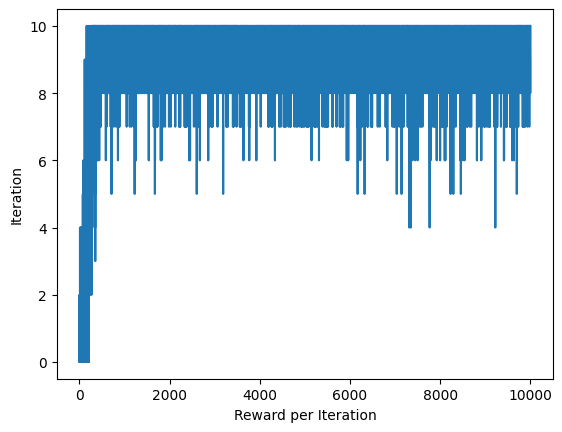


PLOT FOR TEST DATA


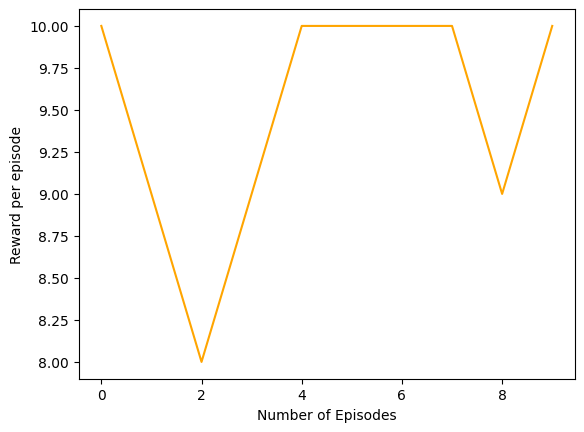

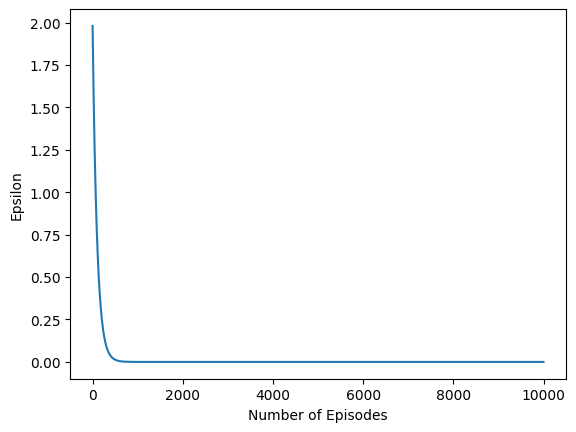

In [ ]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = Q_learning_model(stch, 10000, 2, 0.3)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("/nPLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("\nPLOT FOR TEST DATA")
plt.plot(qs_learn.test_reward1, color = "orange")
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

print("\n")
plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


[[ 4.98318674  4.76103964  6.37286859  4.93279135]
 [ 5.60113659  5.64163771  7.21934887  5.82510302]
 [ 7.74363078  5.74618358  6.56372919  5.81455316]
 [ 8.64762797  7.31920977  7.34614892  7.10854256]
 [ 6.09774492  5.76285501  7.19195075  5.85809951]
 [ 7.92093273  6.45847837  6.77781073  6.42504357]
 [ 8.8616243   6.81626599  7.1448559   7.19696211]
 [ 9.9616      8.12292527  8.25682075  7.80850824]
 [ 5.9085008   6.35577347  7.98078206  6.48250306]
 [ 7.38420947  7.17825736  7.42487264  7.17593438]
 [ 7.7257128   7.18231673  9.96159999  7.42572636]
 [10.          8.98627775 10.          8.99667551]]
REWARD Earned
[0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 0, 3, 0, 4, 1, 0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 5, 1, 2, 2, 3, 1, 0, 1, 0, 0, 1, 3, 3, 4, 3, 0, 6, 5, 5, 2, 7, 5, 0, 0, 4, 

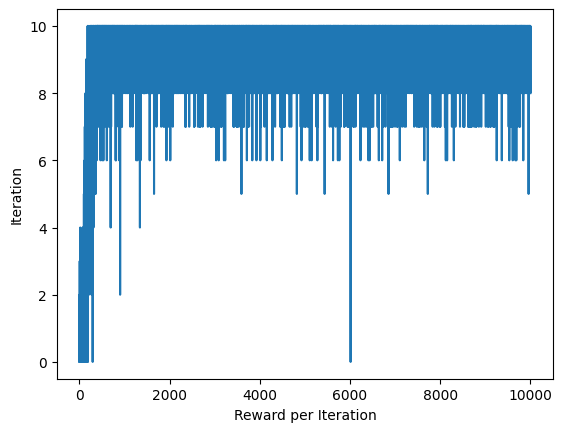


PLOT FOR TEST DATA


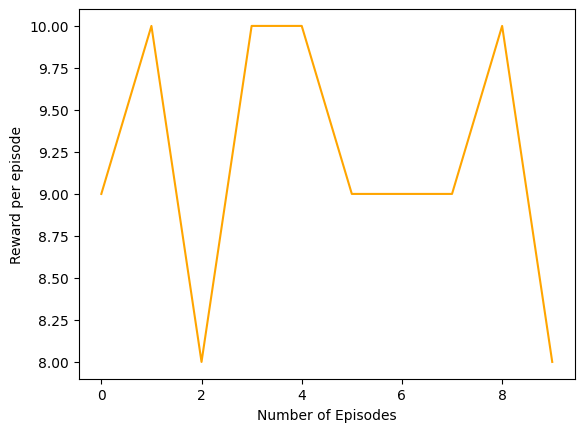

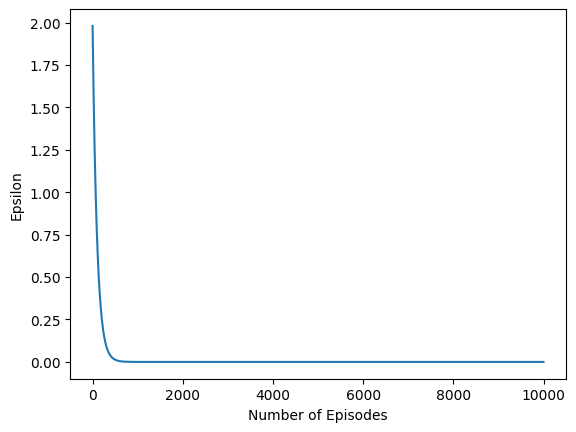

In [13]:
env = GridEnvironment("Determinstic")
stch = GridEnvironment('Stochastic')
qs_learn = Q_learning_model(stch, 10000, 2, 0.6)
qs_learn.train()
qs_learn.test()

print(qs_learn.qtable)

print("REWARD Earned")
print(qs_learn.reward1)

print("/nPLOT REWARD FOR TRAINING DATA")

plt.plot(qs_learn.reward1)
plt.xlabel('Reward per Iteration')
plt.ylabel('Iteration')
plt.show()


print("\nPLOT FOR TEST DATA")
plt.plot(qs_learn.test_reward1, color = "orange")
plt.xlabel('Number of Episodes')
plt.ylabel('Reward per episode')
plt.show()

print("\n")
plt.plot(qs_learn.eps)
plt.xlabel('Number of Episodes')
plt.ylabel('Epsilon')
plt.show()


# Bonus Task

In [15]:
class SARSA_2step_model:
    def __init__(self, env, episodes, epsilon, alpha, gamma=0.9):
        env.reset()
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.num_episodes = episodes
        self.qtable = np.ones([12, 4])-1
        self.reward1 = []
        self.timestep = []
        self.test_timestep = []
        self.test_reward1 = []
        self.eps = []
        self.reset()

    def reset(self):
        self.env.reset()
        self.done = False
        self.action = 0
        self.reward = 0
        self.state = 0
        self.total_reward = 0

    def train(self):
        for i in range(self.num_episodes):
            self.reset()
            if (np.random.rand() < self.epsilon):
                self.action = self.env.action_space.sample()
            else:
                self.action = np.argmax(self.qtable[self.state])

            while not self.done:
                self.qtable[-1] = 0
                _, self.reward, self.done, _ = self.env.step(self.action)
                state1 = (4 * self.env.agent_value[0]) + self.env.agent_value[1]
                if (np.random.rand() < self.epsilon):
                    self.action1 = self.env.action_space.sample()
                else:
                    self.action1 = np.argmax(self.qtable[state1])
                self.total_reward += self.reward

                # 2-step SARSA update
                _, reward2, done2, _ = self.env.step(self.action1)
                state2 = (4 * self.env.agent_value[0]) + self.env.agent_value[1]
                if (np.random.rand() < self.epsilon):
                    self.action2 = self.env.action_space.sample()
                else:
                    self.action2 = np.argmax(self.qtable[state2])
                self.total_reward += reward2

                # calculate the 2-step TD error
                td_error = self.reward + self.gamma * self.qtable[state1][self.action1] + self.gamma ** 2 * \
                           self.qtable[state2][self.action2] - self.qtable[self.state][self.action]

                # update the Q-value for the current state-action pair
                self.qtable[self.state][self.action] += self.alpha * td_error

                # update the state and action for the next iteration
                self.state = state1
                self.action = self.action1

                # set the next reward and done variables for the next iteration
                self.reward = reward2
                self.done = done2

            self.timestep.append(self.env.timestep)
            self.reward1.append(self.total_reward)
            self.epsilon = self.epsilon * 0.99
            self.eps.append(self.epsilon)

    def test(self):
        for _ in range(10):
            self.reset()
            while not self.done:
                self.action = np.argmax(self.qtable[self.state])
                _, self.reward, self.done, _ = self.env.step(self.action)
                self.state = (4 * self.env.agent_value[0]) + self.env.agent_value[1]
                self.total_reward += self.reward

            self.test_reward1.append(self.total_reward)
            self.test_timestep.append(self.env.timestep)


<ipython-input-15-a71169efb93b>:53: RuntimeWarning: overflow encountered in double_scalars
  td_error = self.reward + self.gamma * self.qtable[state1][self.action1] + self.gamma ** 2 * \
<ipython-input-15-a71169efb93b>:53: RuntimeWarning: invalid value encountered in double_scalars
  td_error = self.reward + self.gamma * self.qtable[state1][self.action1] + self.gamma ** 2 * \


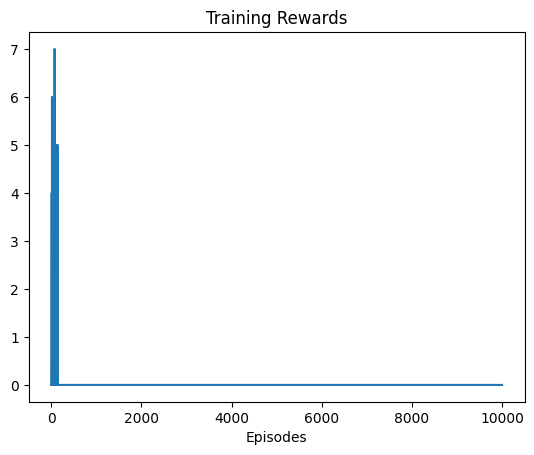

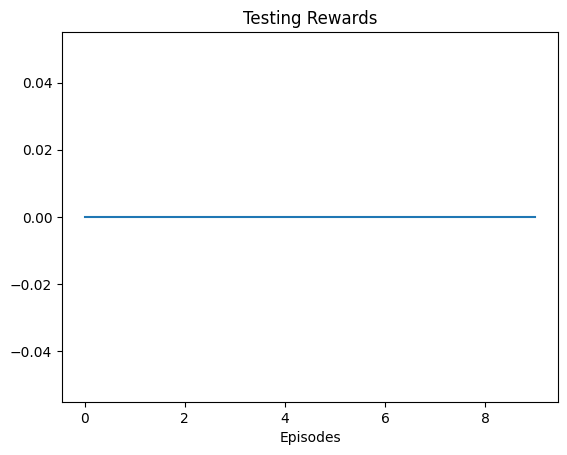

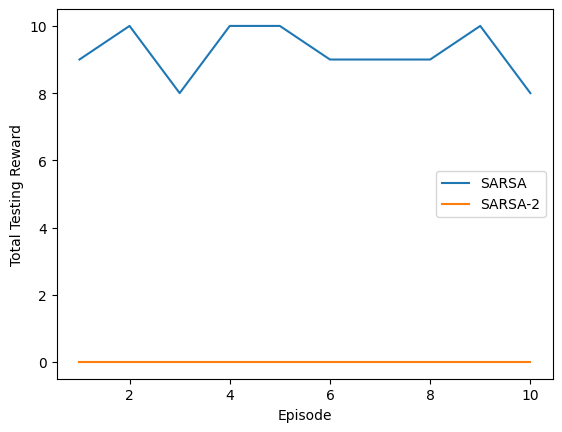

In [16]:

# initialize the environment and model
env = GridEnvironment('Stochastic')
model = SARSA_2step_model(env, episodes=10000, epsilon=1, alpha=0.7)

# train the model
model.train()

# test the model
model.test()

# plot the training rewards and testing rewards
print("\n")
plt.plot(model.reward1)
plt.title("Training Rewards")
plt.xlabel("Episodes")
plt.ylabel
plt.show()

print("\n")
plt.plot(model.test_reward1)
plt.title("Testing Rewards")
plt.xlabel("Episodes")
plt.ylabel
plt.show()

print("\n")
plt.plot(range(1, len(qs_learn.test_reward1)+1), qs_learn.test_reward1, label='SARSA')
plt.plot(range(1, len(model.test_reward1)+1), model.test_reward1, label='SARSA-2')
plt.xlabel('Episode')
plt.ylabel('Total Testing Reward')
plt.legend()
plt.show()

References used: github(deep-reinforcement-learning), Stack Overflow, Yale.edu (Frozenlake - zoo), Medium, ChatGPT